<img src = "https://imgur.com/HE0kDhA.jpg"  align = "center">

# **Soal Praktikum Artificial Neural Network**

Pada soal kali ini anda diminta untuk membuat model NN untuk melakukan klasifikasi dari dataset gambar sell darah dengan kasus penyakit Malaria.
dataset: https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip

Dataset berikut merupakan kumpulan gambar sel darah yang sudah disegmentasi berjumlah 27,558 gambar cell, dimana label yang dimiliki ada 2 jenis yaitu sel darah yang terinfeksi sel parasit (Parasitized), dan sel darah tidak terinfeksi parasit (Uninfected)

Total point jika dikerjakan keseluruhan 100 dan tambahan opsional bonus 15 jika model akurasi klasifikasi report dihasilkan diatas 80%

# 1. Load Data (total point 40)

Task perlu dikerjakan:
1. Unduh dataset dan ekstraksi zip (10 point)
2. Splitting dataset yaitu dengan membuat folder gambar untuk memisahkan gambar tersebut 70% sebagai data training dan 30% sebagai data testing (15 point)
3. Cek penamaan image dan tampilkan jumlah gambar dari hasil splitting dari masing-masing kelas (5 point)
4. Tampilkan 4 image per label beserta judul label dengan ukuran 2 baris x 4 kolom (10 point)

Note:
Lakukan ekstraksi (unzip) pada dataset tersebut, perlu diketahui setelah dilakukan ekstrasi terdapat dua folder pada dataset tersebut bernama Parasitized dan Uninfected, dimana pada folder Parasitized berisi sel gambar yang terinfeksi, dan folder Uninfected berisi sel gambar yang tidak terinfeksi

In [1]:
# Hasil pengerjaan point 1.1
!wget --no-check-certificate \
    https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip \
    -O /content/cell_images.zip

--2020-10-11 10:22:17--  https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip
Resolving ceb.nlm.nih.gov (ceb.nlm.nih.gov)... 130.14.52.15, 2607:f220:41e:7052::15
Connecting to ceb.nlm.nih.gov (ceb.nlm.nih.gov)|130.14.52.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353452851 (337M) [application/zip]
Saving to: ‘/content/cell_images.zip’

/content/cell_image 100%[===================>] 337.08M   108MB/s    in 3.2s    

2020-10-11 10:22:20 (105 MB/s) - ‘/content/cell_images.zip’ saved [353452851/353452851]



Sebelum melakukan splitting jalankan fungsi berikut untuk memastikan isi folder hanya berupa gambar png

In [11]:
import os
import zipfile

local_zip = '/content/cell_images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [12]:
import os
base_dataset = "/content/cell_images"
class_dir = ['Parasitized','Uninfected']
for class_item in class_dir:
  cur_dir = base_dataset+"/"+class_item
  dataset = os.listdir(cur_dir)
  for item in dataset:
    if not item.endswith(".png"):
        os.remove(os.path.join(cur_dir, item))

Note: 
- Fungsi untuk mendapatkan jumlah train gambar
- train_len_func = lambda x: int(70/100*len(x))
- Folder baru untuk training dan validasi path untuk data train dan data validation
- base_dir = 'model_cell_images'

Hasil dari pemindahan sehingga membentuk directory struktur berikut
- model_cell_images/training/Parasitized/*file gambar training parasit
- model_cell_images/training/Uninfected/*file gambar training uninfected
- model_cell_images/validation/Parasitized/*file gambar validation parasit
- model_cell_images/validation/Uninfected/*file gambar validation uninfected

In [13]:
# Hasil pengerjaan point 1.2
import os
import shutil

Parasitized_original = "/content/cell_images/Parasitized"
Parasitized_train = "/content/model_cell_images/train/Parasitized"
Parasitized_validation = "/content/model_cell_images/validation/Parasitized"

files = os.listdir(Parasitized_original)

# memindahkan 70% file
for file in files[0:int(len(files) * .7)]:
  new_path = shutil.move(f"{Parasitized_original}/{file}", Parasitized_train)

In [14]:
files2 = os.listdir(Parasitized_original)

# memmindahkan sisa(seluruh file)
for file in files2:
    new_path = shutil.move(f"{Parasitized_original}/{file}", Parasitized_validation)

In [15]:
Uninfected_original = "/content/cell_images/Uninfected"
Uninfected_train = "/content/model_cell_images/train/Uninfected"
Uninfected_validation = "/content/model_cell_images/validation/Uninfected"

filesUn = os.listdir(Uninfected_original)

# memindahkan 70% file
for file in filesUn[0:int(len(filesUn) * .7)]:
    new_path = shutil.move(f"{Uninfected_original}/{file}", Uninfected_train)

In [16]:
files2Un = os.listdir(Uninfected_original)

# memmindahkan sisa(seluruh file)
for file in files2Un:
    new_path = shutil.move(f"{Uninfected_original}/{file}", Uninfected_validation)

In [17]:
# Hasil pengerjaan point 1.3
file_train_Para = os.listdir(Parasitized_train)
file_Val_Para = os.listdir(Parasitized_validation)
file_train_Un = os.listdir(Uninfected_train)
file_Val_Un = os.listdir(Uninfected_validation)

print(file_train_Para[0:int(len(file_train_Para) * .001)])
print("data Parasitized train : " + str(len(file_train_Para)))
print("data Parasitized validation : " + str(len(file_Val_Para)))
print("data Uninfected train : " + str(len(file_train_Un)))
print("data Uninfected validation : " + str(len(file_Val_Un)))

['C136P97ThinF_IMG_20151005_140538_cell_98.png', 'C70P31_ThinF_IMG_20150819_142239_cell_7.png', 'C70P31_ThinF_IMG_20150813_131457_cell_3.png', 'C126P87ThinF_IMG_20151004_105844_cell_150.png', 'C175P136NThinF_IMG_20151127_141428_cell_221.png', 'C184P145ThinF_IMG_20151203_102405_cell_161.png', 'C184P145ThinF_IMG_20151203_104030_cell_31.png', 'C129P90ThinF_IMG_20151004_133329_cell_106.png', 'C136P97ThinF_IMG_20151005_142437_cell_131.png']
data Parasitized train : 9645
data Parasitized validation : 4134
data Uninfected train : 9645
data Uninfected validation : 4134


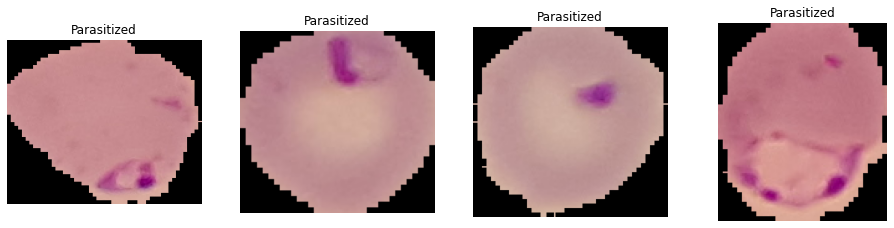

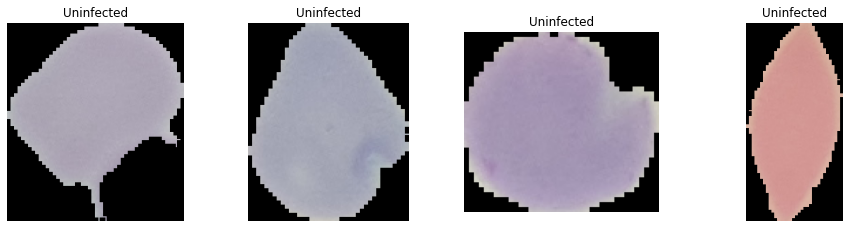

In [18]:
# Hasil pengerjaan point 1.4
import matplotlib.pyplot as plt
import matplotlib.image as mping

Parasitized_dir=os.path.join('/content/model_cell_images/train/Parasitized')
Uninfected_dir=os.path.join('/content/model_cell_images/train/Uninfected')

Parasitized_image = os.listdir(Parasitized_dir)
Uninfected_image = os.listdir(Uninfected_dir)

fname1 = [os.path.join(Parasitized_dir,fname)
        for fname in Parasitized_image[:4]]

fname2 = [os.path.join(Uninfected_dir,fname)
        for fname in Uninfected_image[:4]]

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Parasitized')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Uninfected')
    plt.imshow(img)
    
plt.show()

# 2. Preprocessing (total point 20)

Task perlu dikerjakan:
1. Gather data train dan validation dengan ukuran gambar 100 x 100 (point 10)
2. Tampilkan shape dari data train dan data validation (point 5)
3. Normalisasi dataset, membuat dan menampilkan hasil dari label encoder (point 5)

In [19]:
# Hasil pengerjaan point 2.1
import os
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []

train_dir=os.path.join('/content/model_cell_images/train')
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (100,100))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [20]:
# Gather data validation
val_data = []
val_label = []

vali_dir=os.path.join('/content/model_cell_images/validation')
for r, d, f in os.walk(vali_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (100,100))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [21]:
# Hasil pengerjaan point 2.2
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (19290, 100, 100, 3)
Train Label =  (19290,)
Validation Data =  (8268, 100, 100, 3)
Validation Label =  (8268,)


In [22]:
# Hasil pengerjaan point 2.3
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])
x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [0 0 0]
Data setelah di-normalisasi  [0. 0. 0.]


In [23]:
from sklearn.preprocessing import LabelEncoder
print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['Uninfected' 'Uninfected' 'Uninfected' 'Uninfected' 'Uninfected'
 'Uninfected' 'Uninfected' 'Uninfected' 'Uninfected' 'Uninfected']
Label setelah di-encoder  [1 1 1 1 1 1 1 1 1 1]


# 3. Definisikan Model (total point 20)

Buat model dengan kriteria:
- 1 layer input, ukuran layer input (shape) menjadi 100x100
- minimal 3 hidden layer dengan jumlah dense / node sesuai dengan analisa masing" menggunakan fungsi aktifasi relu
- dan 1 layer output binary

Task yang perlu dikerjakan:
1. Mendefinisikan model sesuai dengan kriteria dan menampilkan hasil summary (point 10)
2. Compiler model menggunakan Adam optimizer dan melakukan training dengan batch size 32 dan epoch sesuai dengan kemauan masing" (point 10)

In [24]:
# Hasil pengerjaan point 3.1
from tensorflow.keras import layers
from tensorflow.keras import Model

img_input = layers.Input(shape=(100, 100, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 100x100x3 menjadi vektor
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               15360512  
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 15,524,865
Trainable params: 15,524,865
Non-trainable params: 0
__________________________________________

In [25]:
# Hasil pengerjaan point 3.2
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])
H = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
603/603 [==============================] - 74s 122ms/step - loss: 0.8123 - acc: 0.5810 - val_loss: 0.6328 - val_acc: 0.6442
Epoch 2/10
603/603 [==============================] - 74s 123ms/step - loss: 0.6757 - acc: 0.5499 - val_loss: 0.6932 - val_acc: 0.5002
Epoch 3/10
603/603 [==============================] - 73s 121ms/step - loss: 0.6928 - acc: 0.4978 - val_loss: 0.6932 - val_acc: 0.5001
Epoch 4/10
603/603 [==============================] - 73s 122ms/step - loss: 0.6930 - acc: 0.5002 - val_loss: 0.6932 - val_acc: 0.5002
Epoch 5/10
603/603 [==============================] - 73s 121ms/step - loss: 0.6932 - acc: 0.4973 - val_loss: 0.6932 - val_acc: 0.5002
Epoch 6/10
603/603 [==============================] - 74s 122ms/step - loss: 0.6931 - acc: 0.4992 - val_loss: 0.6931 - val_acc: 0.5004
Epoch 7/10
603/603 [==============================] - 73s 122ms/step - loss: 0.6932 - acc: 0.4968 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 8/10
603/603 [==============================] - 7

# 4. Hasil Model (total point 20)

Task yang perlu dikerjakan:
1. Plot hasil training model berupa hasil validasi akurasi dan validasi loss (total 10 point)
2. Buat report klasifikasi beserta dengan keterangan labelnya (total 10 point)
3. Tambahan point 15 jika akurasi diatas 80% (Opsional)

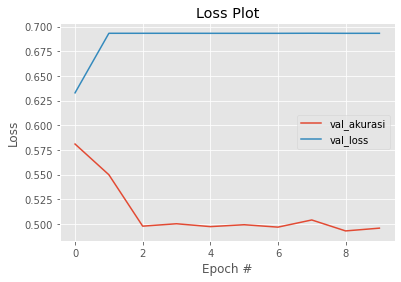

In [26]:
# Hasil pengerjaan point 4.1
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), H.history["acc"], label="val_akurasi")
plt.plot(np.arange(0, 10), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [27]:
# Hasil pengerjaan point 4.2
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      4134
           1       0.50      1.00      0.67      4134

    accuracy                           0.50      8268
   macro avg       0.75      0.50      0.33      8268
weighted avg       0.75      0.50      0.33      8268

